
# First Project: Weather data analysis
### by Omar BOUGACHA

## 1- Introduction

As a start up project in the UDACITY Data Analyst Nanodegree, we are asked to analyze some weather temperature data. This analysis is quite basic, in which we are asked to compare global temperature to the temperature of the closest city to where we live. This is just an introduction project. Its objective is to assess our entrance level. The following tasks are done in this project: 
* we use SQL queries to access data from SQL databases (given by UDACITY),
* we perform some calculation including computing the moving average (to capture the trends), 
* we use some plotting techniques to communicate findings, and 
* we should compare the global temperature trends to a city of our choice. 

For this project, I answer the following questions:
* Is the chosen city's temperatures is hotter of cooler than the global temperatures?
* Is the difference of temperature consistent over time?
* How do the changes in the city’s temperatures over time compare to the changes in the global average?
* What does the overall trend look like? 
* Is the world getting hotter or cooler?
* Has the trend been consistent over the last few hundred years?



## 2- Data Wrangling: 



The weather database is given by UDACITY. In this part, I present the SQL queries used to extract the relevant data for the global temperatures and the temperatures of Paris. This task requires to gather data from two different tables and merge them into a single one:

SELECT  city_data.year AS "Year",

        global_data.avg_temp AS "Global_Temp",
        city_data.avg_temp AS "Paris_Temp"     
        
FROM city_data

JOIN global_data on global_data.year=city_data.year

WHERE city_data.city='Paris'

The obtained table is then saved to a csv file under the name "Paris.csv". For the rest of this project, I use python to perform the necessary calculation, plotting, and analysis. Therefore, I used the following libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 3- Loading Data

Using the pandas module, we load the csv file contents to a table structure called dataframe. 

In [2]:
w_data = pd.read_csv('Data/Paris.csv')
w_data.head(2)

,Year,Global_Temp,Paris_Temp
0,1750,8.72,11.18
1,1751,7.98,11.15


## 4- Data Analysis

Lets start by plotting the yearly global and Paris temperatures without any processing of the data. 

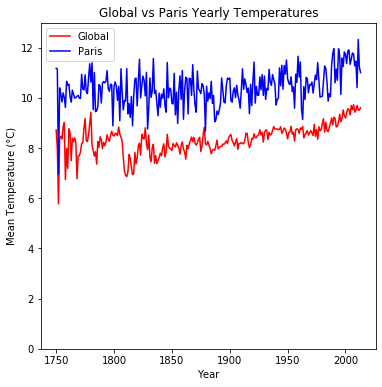

In [3]:
plt.figure(figsize=(6,6))
plt.plot(w_data['Year'], w_data['Global_Temp'], label='Global', color='r')
plt.plot(w_data['Year'], w_data['Paris_Temp'], label='Paris', color='b')
plt.ylabel('Mean Temperature (°C)')
plt.xlabel('Year')
plt.title('Global vs Paris Yearly Temperatures')
plt.ylim((0,13))
plt.legend()
plt.show()

From the obtained graph, we can already answer the first question. The choosen city (i.e. Paris) is hotter than the global temperature. However, the presented curves are too **volatile** and have alot of **fluctuations** over the years. Although it can be observed that the curve has a **growing trend** it is not that clear. Therefore, we should use the **moving average** to smooth out data to make it easier to observe long term trends. However, moving averages are computed on a customized duration. And this parameter (i.e. the duration) is important. On one hand, choosing a short duration will not provide a good smoothing of the curve and the fluctuations although reduced will still disturb the analysis process. On the other hand, choosing a long duration and the trend of the curves will be averaged and lost. 

I define the following function to compute the moving average of data series (i.e. 1D array) over a specified duration. 

In [4]:
def moving_avg(data,duration):
    m_avg_data=[]
    i=duration
    while i<=len(data):
        m_avg_data.append(np.mean(data[i-duration:i]))
        i+=1
    return m_avg_data

Since the quality of the moving average depends of the duration of the time window, I computed and plotted the moving average for **three** values (5-years, 10-years, and 15-years). 

#### 5-years Moving Average

In [5]:
gt_m_avg=moving_avg(w_data['Global_Temp'].values.tolist(),duration=5)
P_m_avg=moving_avg(w_data['Paris_Temp'].values.tolist(),duration=5)
yr_m_avg = w_data['Year'].values.tolist()[4:]
m_avg_data_5 = pd.DataFrame({'Year':yr_m_avg, 'Global_Temp':gt_m_avg, 'Paris_Temp':P_m_avg})
m_avg_data_5.head(2)

,Year,Global_Temp,Paris_Temp
0,1754,7.868,9.970
1,1755,7.796,9.702


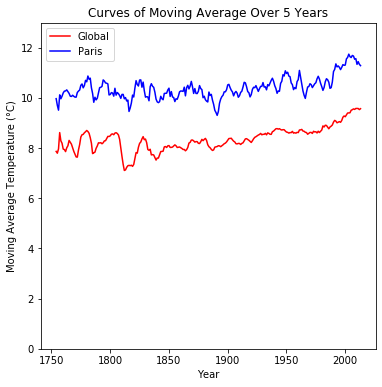

In [6]:
plt.figure(figsize=(6,6))
plt.plot(m_avg_data_5['Year'], m_avg_data_5['Global_Temp'], label='Global', color='r')
plt.plot(m_avg_data_5['Year'], m_avg_data_5['Paris_Temp'], label='Paris', color='b')
plt.ylabel('Moving Average Temperature (°C)')
plt.xlabel('Year')
plt.title('Curves of Moving Average Over 5 Years')
plt.ylim((0,13))
plt.legend()
plt.show()

#### 10-years Moving Average

In [7]:
gt_m_avg=moving_avg(w_data['Global_Temp'].values.tolist(),duration=10)
P_m_avg=moving_avg(w_data['Paris_Temp'].values.tolist(),duration=10)
yr_m_avg = w_data['Year'].values.tolist()[9:]
m_avg_data_10 = pd.DataFrame({'Year':yr_m_avg, 'Global_Temp':gt_m_avg, 'Paris_Temp':P_m_avg})
m_avg_data_10.head(2)

,Year,Global_Temp,Paris_Temp
0,1759,8.030,10.019
1,1760,7.877,9.951


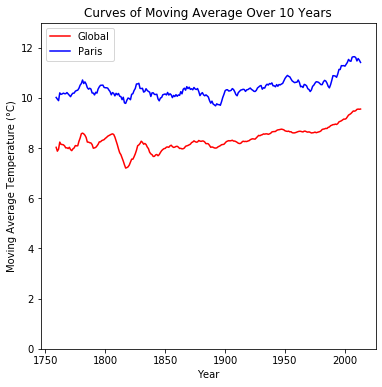

In [8]:
plt.figure(figsize=(6,6))
plt.plot(m_avg_data_10['Year'], m_avg_data_10['Global_Temp'], label='Global', color='r')
plt.plot(m_avg_data_10['Year'], m_avg_data_10['Paris_Temp'], label='Paris', color='b')
plt.ylabel('Moving Average Temperature (°C)')
plt.xlabel('Year')
plt.title('Curves of Moving Average Over 10 Years')
plt.ylim((0,13))
plt.legend()
plt.show()

#### 15-Years Moving Average

In [9]:
gt_m_avg=moving_avg(w_data['Global_Temp'].values.tolist(),duration=15)
P_m_avg=moving_avg(w_data['Paris_Temp'].values.tolist(),duration=15)
yr_m_avg = w_data['Year'].values.tolist()[14:]
m_avg_data_15 = pd.DataFrame({'Year':yr_m_avg, 'Global_Temp':gt_m_avg, 'Paris_Temp':P_m_avg})
m_avg_data_15.head(2)

,Year,Global_Temp,Paris_Temp
0,1764,8.051333,10.096000
1,1765,8.020000,10.027333


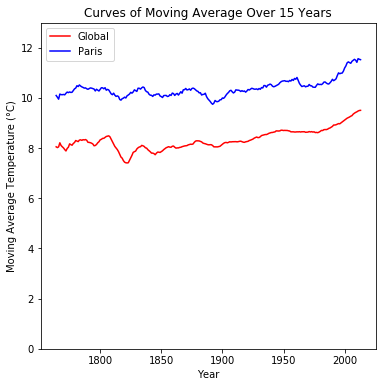

In [10]:
plt.figure(figsize=(6,6))
plt.plot(m_avg_data_15['Year'], m_avg_data_15['Global_Temp'], label='Global', color='r')
plt.plot(m_avg_data_15['Year'], m_avg_data_15['Paris_Temp'], label='Paris', color='b')
plt.ylabel('Moving Average Temperature (°C)')
plt.xlabel('Year')
plt.title('Curves of Moving Average Over 15 Years')
plt.ylim((0,13))
plt.legend()
plt.show()

#### Comparation: 

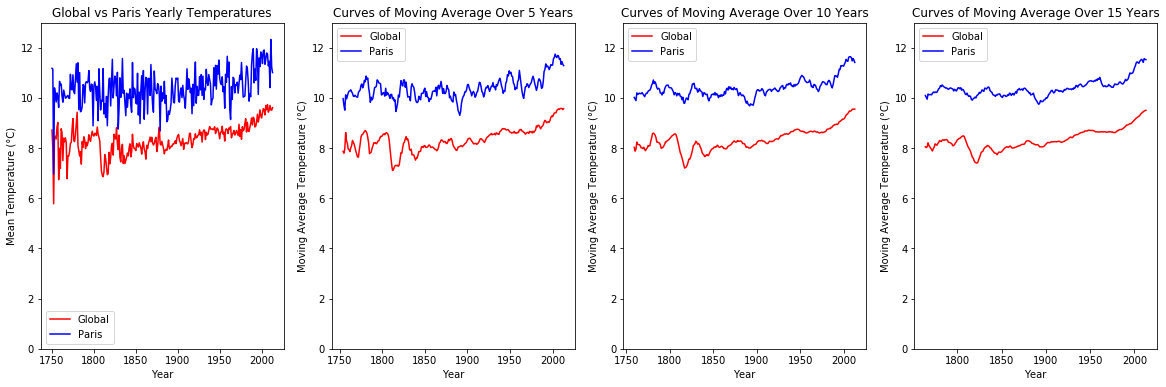

In [11]:
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt.plot(w_data['Year'], w_data['Global_Temp'], label='Global', color='r')
plt.plot(w_data['Year'], w_data['Paris_Temp'], label='Paris', color='b')
plt.ylabel('Mean Temperature (°C)')
plt.xlabel('Year')
plt.title('Global vs Paris Yearly Temperatures')
plt.ylim((0,13))
plt.legend()
plt.subplot(1,4,2)
plt.plot(m_avg_data_5['Year'], m_avg_data_5['Global_Temp'], label='Global', color='r')
plt.plot(m_avg_data_5['Year'], m_avg_data_5['Paris_Temp'], label='Paris', color='b')
plt.ylabel('Moving Average Temperature (°C)')
plt.xlabel('Year')
plt.title('Curves of Moving Average Over 5 Years')
plt.ylim((0,13))
plt.legend()
plt.subplot(1,4,3)
plt.plot(m_avg_data_10['Year'], m_avg_data_10['Global_Temp'], label='Global', color='r')
plt.plot(m_avg_data_10['Year'], m_avg_data_10['Paris_Temp'], label='Paris', color='b')
plt.ylabel('Moving Average Temperature (°C)')
plt.xlabel('Year')
plt.title('Curves of Moving Average Over 10 Years')
plt.ylim((0,13))
plt.legend()
plt.subplot(1,4,4)
plt.plot(m_avg_data_15['Year'], m_avg_data_15['Global_Temp'], label='Global', color='r')
plt.plot(m_avg_data_15['Year'], m_avg_data_15['Paris_Temp'], label='Paris', color='b')
plt.ylabel('Moving Average Temperature (°C)')
plt.xlabel('Year')
plt.title('Curves of Moving Average Over 15 Years')
plt.ylim((0,13))
plt.legend()
plt.show()

We can see that the higher the window (duration) of the moving average the smoother the curve is and the clearer the trends become. 

We can also conclude on the **growing** temperature trends. We can also conclude on the fact that both Paris and the global temperatures have the same **growing** trends. We can see that the blue curves of Paris are similar to the curves of the global temperature. However, we cannot conclude if the difference in temperature is consistent over time. Therefore, I plotted the difference between the Paris and global temperature for the case of a 15-years moving average.

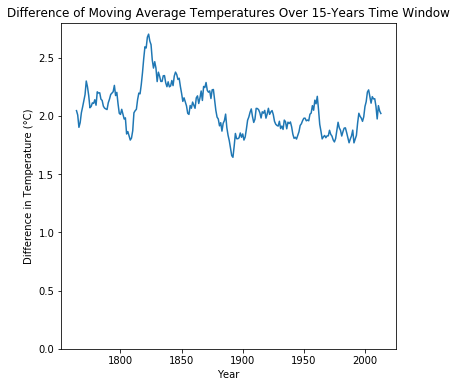

In [12]:
differences = m_avg_data_15['Paris_Temp'] - m_avg_data_15['Global_Temp']
plt.figure(figsize=(6,6))
plt.plot(m_avg_data_15['Year'], differences)
plt.ylabel('Difference in Temperature (°C)')
plt.xlabel('Year')
plt.title('Difference of Moving Average Temperatures Over 15-Years Time Window')
plt.ylim((0,2.8))
plt.show()

In [13]:
differences.describe()

count    250.000000
mean       2.049395
std        0.191210
min        1.644000
25%        1.902500
50%        2.028667
75%        2.166667
max        2.701333
dtype: float64

The figure shows that the difference in the temperature. It is seen that there are some fluctuations. But the difference in temperature is limited between $1.65$ and $2.7$, with a mean value of $2.05$ and a standard deviation of $0.19$. We can conclude that the difference in temperature is quite consistent over time.

To summarize, here are the answers to the proposed questions: 
* One can easily notice that over time the temperature of Paris and the global temperature undergo the same changes. 
* It seems like the overall trends of temperature for both the considered city and the global are increasing. 
* Since the curves of temperatures are growing, then the world seems like getting hotter. 
* We can see that over the few last hundred years the global temperature has seen some decline especially around 1810-1820. Thus we can say that the trends of temperature are not consistent in the last few hundred years. However, they are very consistent since 1970.

At this point, I have fulfilled the objective set by Udacity for this first project. However, I still have some unanswered questions. Is there any correlation between global and Paris temperatures? How does this correlation react to the duration of the moving average? One can also analyze some other cities to see if there are any differences in the trends?

## 5- Bonus Data Analysis

#### Correlation Study

First, let's start by computing the correlations between the different features of our data. I used the Pearson correlation method. I computed the correlations for all obtained data (i.e. the original data, the 5-years moving average, 10-years moving average, and 15-years moving average).

In [14]:
w_data.corr(method='pearson')

,Year,Global_Temp,Paris_Temp
Year,1.000000,0.612115,0.374821
Global_Temp,0.612115,1.000000,0.552188
Paris_Temp,0.374821,0.552188,1.000000


In [15]:
m_avg_data_5.corr()

,Year,Global_Temp,Paris_Temp
Year,1.000000,0.708965,0.581647
Global_Temp,0.708965,1.000000,0.780654
Paris_Temp,0.581647,0.780654,1.000000


In [16]:
m_avg_data_10.corr()

,Year,Global_Temp,Paris_Temp
Year,1.000000,0.744770,0.627126
Global_Temp,0.744770,1.000000,0.865437
Paris_Temp,0.627126,0.865437,1.000000


In [17]:
m_avg_data_15.corr()

,Year,Global_Temp,Paris_Temp
Year,1.000000,0.772894,0.644659
Global_Temp,0.772894,1.000000,0.883474
Paris_Temp,0.644659,0.883474,1.000000


* As a general remark, we can notice that the higher the duration of the moving average the higher the correlation between the variables. This can be explained that correlation shows the trends between the variables and with moving averages we are extracting the trend of the temperatures which helps to compute the relationship between the variable trends. 
* We can notice that all correlation coefficient between the years and the temperatures are positive. This reinforces the observation of the trends. In other words, the temperatures tend to become hotter when the years advance. 
* Global and Paris temperatures are also quite correlated. Meaning that both temperatures have quite similar trends. However, a high correlation coefficient does not mean that we can use one of the features to predict the other one. This is mainly because correlation does not imply (mean) causation.

#### Other Cities

For this part of the analysis, I saved the whole table containing the cities data from weather database into a csv file called '*all_cities.csv*'. Then, I performed the analysis using pandas functions. Lets load the data of all cities.

In [18]:
all_cities = pd.read_csv("Data/all_cities.csv")
print(all_cities.shape)
all_cities.head(2)

(70792, 4)


,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52


Lets move up more to the north and see what analysis could be found. Therefore, I chose this time to work with Helsinki's temperature data. 

Lets get the Helsinki's data. 

In [19]:
Helsinki_df = all_cities[all_cities['city']=='Helsinki']
Helsinki_df.head(2)

,year,city,country,avg_temp
25319,1743,Helsinki,Finland,1.55
25320,1744,Helsinki,Finland,6.32


The features city and country contain only single values respectively Helsinki and Finland. Therefore, they are to be droped. However, the name of the feature 'avg_temp' should be changed to 'Helsinki_Temp'.

In [20]:
Helsinki_df = Helsinki_df.drop(['city', 'country'], axis = 1)
Helsinki_df = Helsinki_df.rename(columns={'year': 'Year', "avg_temp": "Helsinki_Temp"})
Helsinki_df.head(2)

,Year,Helsinki_Temp
25319,1743,1.55
25320,1744,6.32


Now, we should add the global data using the merge method. 

In [21]:
Helsinki_df = Helsinki_df.merge(w_data[['Year','Global_Temp']], on='Year')
Helsinki_df.head(2)

,Year,Helsinki_Temp,Global_Temp
0,1750,5.14,8.72
1,1751,4.68,7.98


We now compute the 15-years moving average

In [22]:
gt_m_avg=moving_avg(Helsinki_df['Global_Temp'].values.tolist(),duration=15)
P_m_avg=moving_avg(Helsinki_df['Helsinki_Temp'].values.tolist(),duration=15)
yr_m_avg = Helsinki_df['Year'].values.tolist()[14:]
h_avg_data_15 = pd.DataFrame({'Year':yr_m_avg, 'Global_Temp':gt_m_avg, 'Helsinki_Temp':P_m_avg})
h_avg_data_15.head(2)

,Year,Global_Temp,Helsinki_Temp
0,1764,8.051333,3.819333
1,1765,8.020000,3.758000


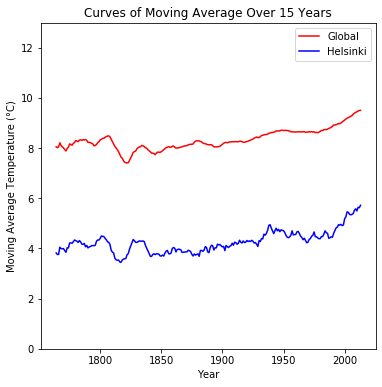

In [23]:
plt.figure(figsize=(6,6))
plt.plot(h_avg_data_15['Year'], h_avg_data_15['Global_Temp'], label='Global', color='r')
plt.plot(h_avg_data_15['Year'], h_avg_data_15['Helsinki_Temp'], label='Helsinki', color='b')
plt.ylabel('Moving Average Temperature (°C)')
plt.xlabel('Year')
plt.title('Curves of Moving Average Over 15 Years')
plt.ylim((0,13))
plt.legend()
plt.show()

We can see that for Helsinki, the city is cooler than the global temperatures. However, the same observations about the trends are still valid. The temperatures in Helsinki are raising recently and the city is becoming hotter. However, we can notice that the fluctuation in the city's temperatures is so important despite the use of the moving average with a 15-years window. This raising a lot of questions like why the weather in Helsinki is not as stable as the one in Paris? Does global warming have more influence on northern cities than other cities?

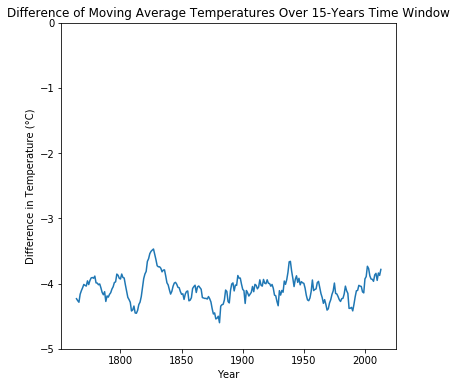

In [24]:
differences2 = h_avg_data_15['Helsinki_Temp'] - h_avg_data_15['Global_Temp']
plt.figure(figsize=(6,6))
plt.plot(h_avg_data_15['Year'], differences2)
plt.ylabel('Difference in Temperature (°C)')
plt.xlabel('Year')
plt.title('Difference of Moving Average Temperatures Over 15-Years Time Window')
plt.ylim((-5,0))
plt.show()

In [25]:
differences2.describe()

count    250.000000
mean      -4.075797
std        0.195773
min       -4.600000
25%       -4.206667
50%       -4.073333
75%       -3.965667
max       -3.470000
dtype: float64

I also plotting the difference in temperatures between Helsinki and the global ones to check for the consistency in the difference. In the obtained figure, we can notice that the difference in temperature goes between $-4.6$ and $-3.47$ with a mean value of $-4.08$ and a standard deviation of $0.19$. We can notice that both Paris and Helsinki have the same standard deviation of the temperature difference with global temperatures. We can also note that the curves for the differences between these two cities are quite similar. 

In [26]:
h_avg_data_15.corr()

,Year,Global_Temp,Helsinki_Temp
Year,1.000000,0.772894,0.685808
Global_Temp,0.772894,1.000000,0.896418
Helsinki_Temp,0.685808,0.896418,1.000000


Finally, the correlation matrix of this data presented in computed above. We can notice that all coefficients are positive. However, the values are a bit higher than the Paris coefficient. This also drives us to ask more questions about the influence of global warming on the northern cities.